# Housing Market Predictions #

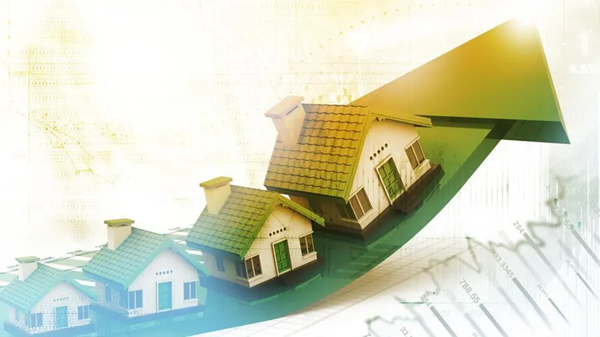

In [1]:
from IPython.display import Image
Image(filename =r'housing.png')

# Installing Required Libraries #

In [2]:
import openpyxl # library that allows reading and writing Excel files .xlsx
import csv # this library will write to data to a CSV file

import pandas as pd
import statistics as states
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install openpyxl pandas

# Loading Dataset #

In [4]:
df = pd.DataFrame(pd.read_csv("CA2_Dataset.xlsx"))

# Exploratory Data Analysis (EDA) #

Is a critical step in data analysis or machine learning. Summarizes main characteristics, indentify patterns and relationships and uncovering insights. EDA is a diagnostic phase where adata quality issues are identified and addressed. 

## Characterisation of the data set

> Size, number of attributes, missing values, number of observations, are fundamental summaries of data properties *(Webson, 2025)*. These properties are crutial for deciding which statistical methods to use and which machine learning models are appropirate.
> - Statistical Meaning: a large size (more observations) generally provides more statistical power, making the results more reliable.
> - Model Training: larger datasets often help machine learning models learn complex patterns better and reduce the risk of overfitting.
> - Data Loss Tolerance: in a large dataset we can afford to drop some rows with missing or incorrect data without significantly impacting the analysis.
> - Dimensionality: defines the 'width' of the data
> - Curse of Dimensionality: a very high number of attributes relative to the number of observations can lead to the "curse of dimensionality", where models struggle to find meaningful patterns and may overfit.
> - Feature Engineering: the number and type of attributes determine the types of analysis and feature engineering steps available.
> - Data Quality and Reliability: missing values represents an issue with data quality. How they are handled significantly impacts the accuracy of results.
> - Bias: if a lot of data is missing it can introduce bias into the analysis, making the sample unrepresentative of the population. 

The **df.head()** function displays first 5 rows of the DataFrame. Its essential for quick look at the data to ensure it has loaded correctly and to get understanding of its structure, columns, and data types. It can be customized by specifying a different number of rows by passing an integger argument, for example *df.head(10)* it will return first 10 rows *(pandas.DataFrame.head, 2025)*.

In [5]:
df.head()

,county,avg_income_eur,avg_land_price_eur_m2,transport_score,school_quality_index,crime_rate_per_10k,green_space_pct,flood_risk_score,broadband_score,house_type,demand_score,demand_category,predicted_house_price_eur
0,Carlow,35980.28,75.85,5.97,7.02,27.66,28.13,3.18,5.44,Apartment,64.448103,Average,78098.14
1,Carlow,29571.72,52.28,1.08,6.45,38.16,17.81,1.68,5.24,Semi-Detached,36.735072,Average,73503.34
2,Carlow,29733.70,83.33,3.27,5.88,23.99,27.67,0.67,6.99,Terraced,36.575152,Average,75004.94
3,Carlow,49669.88,115.81,5.33,6.38,19.91,17.33,3.15,4.64,Detached,65.913075,Average,152940.93
4,Carlow,28938.47,98.35,6.55,6.43,21.61,27.53,1.66,4.67,Detached,44.816833,Average,107326.78


In [6]:
df.tail()

,county,avg_income_eur,avg_land_price_eur_m2,transport_score,school_quality_index,crime_rate_per_10k,green_space_pct,flood_risk_score,broadband_score,house_type,demand_score,demand_category,predicted_house_price_eur
2075,Wicklow,42754.50,72.97,3.38,5.18,36.28,29.57,0.98,5.57,Apartment,46.327921,Average,77780.72
2076,Wicklow,21577.18,125.38,5.32,4.81,32.22,23.32,0.03,3.68,Semi-Detached,25.257086,Low,81847.68
2077,Wicklow,32013.17,81.08,4.49,5.02,37.71,44.30,2.22,7.22,Apartment,45.356938,Average,70058.83
2078,Wicklow,24717.41,74.74,4.74,6.29,36.75,21.92,4.70,6.20,Detached,40.625789,Average,91023.57
2079,Wicklow,38681.16,89.56,3.48,6.13,22.13,31.69,0.61,6.80,Detached,69.315975,High,129475.48


In [7]:
#printing all columns names
print(df.columns)

Index(['county', 'avg_income_eur', 'avg_land_price_eur_m2', 'transport_score',
       'school_quality_index', 'crime_rate_per_10k', 'green_space_pct',
       'flood_risk_score', 'broadband_score', 'house_type', 'demand_score',
       'demand_category', 'predicted_house_price_eur'],
      dtype='object')


**Data Dictionary**

> **1. county:** used for geographical and administrative segmentation of the market
>
> **2. avg_income_eur:** average annual gross earnings of individuals or households in a specific area measured in Euros. 
>
> **3. avg_land_price_eur_m2:** average price of residential development land per square meter, expressed in Euros  
>
> **4. transport_score:** a metric that measures how well a specific location is served by public transportation on a scale from 0 to 100.
>         This parameter has an impact on the property value which could be reflected in buyer demand. 
>         
> **5. school_quality_index:** or SQI is a generalized term for metrics used to quantify the performance and desirability of local schools.
>      It is not a single, universal number but an aggregate assessment based on various factors.  
>   
> **6. crime_rate_per_10k:** this rate is calculated by dividing the number of reported crimes in a specific area by that area's total >population. 
>
> **7. green_space_pct:** (pct-percentage) is a metric that quantifies the proportion of an area dedicated to parks, gardens and other 
>           natural landscapes.   
>            
> **8. flood_risk_score:** is a metric used to quantify the potential likelihood and impact of flooding on a specific property or area.
>      This assesment will influence property value, insurance cost and overall interest.    
>         
> **9. broadband_score:** is a metric that quantifies the quality, speed, and availability of internet connectivity for a specific property >  or neighbourhood.   
>     
> **10. house_type:** categorical variable used to classify residential properties based on their architectural style, for example: detached
>                house, apartment, bungalow, cottage...  
>              
> **11. demand_score:** ("Hotness Index") a numerical value which describes the level of interest from potential buyers relative to the >available supply of properties in a specific location.   
>
> **12. demand_category:** demand score which tells a buyer, seller or investor whether a specific area currently favours the purchases.     >     
> **13. predicted_house_price_eur:** forecast of a property market value, expressed in Euros 

The **df.info()** code prints a summary of a DataFrame to the console, which is important in data Expolration processes. It provides key information about dataset structure and contents without displaying the actual data. Identifying columns with missing values and plan data cleaning strategies. Checking if data types are appropriate for specific operations (ensuring numeric columns are not *object* types). General overview of the size and structire of the dataset *(pandas.DataFrame.info, 2025)*.

1. Total entries (rows): number of entries and the range of the index - from 0 to 2,079, total of 2,080 
2. Total columns: number of columns (features) in the DataFrame - 13 columns
3. Column information: for each column
    - Column Name
    - Non-null count: number of non-missing (non-Na/null) values in each column, crutial for identifying columns with missing data, for example
      we can see that county count is 2,080 where avg_income_eur count is 2,077 which means that there are 3 null values in this column
    - Data type (dtype): data type stored in each column: object (3) and float64 (10).
4. Memory usage: an estimate of the memory the DataFrame is using, which helps in managing memory resources for large datasets.
5. Index type: Information about the type of index being used (RangeIndex)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county                     2080 non-null   object 
 1   avg_income_eur             2077 non-null   float64
 2   avg_land_price_eur_m2      2080 non-null   float64
 3   transport_score            2077 non-null   float64
 4   school_quality_index       2075 non-null   float64
 5   crime_rate_per_10k         2075 non-null   float64
 6   green_space_pct            2080 non-null   float64
 7   flood_risk_score           2077 non-null   float64
 8   broadband_score            2080 non-null   float64
 9   house_type                 2080 non-null   object 
 10  demand_score               2080 non-null   float64
 11  demand_category            2080 non-null   object 
 12  predicted_house_price_eur  2080 non-null   float64
dtypes: float64(10), object(3)
memory usage: 211.4+ K

The **df.dtypes** returns a Series with the data type of each column. Columns with mixed types are stored with the object dtype and require further investigation. Pandas library uses NumPy arrays and dtypes for Series or individual columns pf a DataFrame. NumPy provides support for: float, int, bool, timedelta64[ns] and datetime64[ns]. There are two types of of features categorical (object) and quantitative (Integer, float). Dummy variables (binary features) also can be considered quantitative as they can represent individual categories *(Mirkin, 2010)*.

1. **integer (int)**: stores whole numbers (positive, negative or zero) without any fractional or decimal parts.
2. **float (floating-point)**: used to store numbers that have a fractional part or a decimal point.
3. **object**: can store all data type that can be a variety of objects, strings and mixed data types, integers, floats, lists and dictionaries.

**Attributes and data Types:**

**Numerical attributes (float64): 10**
1. avg_income_eur
2. avg_land_price_eur_m2
3. transport_score
4. school_quality_index
5. crime_rate_per_10k
6. green_space_pct
7. flood_risk_score
8. broadband_score
9. demand_score
10. predicted_house_price_eur

**Categorical attributes (object): 3**
1. county
2. house_type
3. demand_category

In [9]:
df.dtypes

county                        object
avg_income_eur               float64
avg_land_price_eur_m2        float64
transport_score              float64
school_quality_index         float64
crime_rate_per_10k           float64
green_space_pct              float64
flood_risk_score             float64
broadband_score              float64
house_type                    object
demand_score                 float64
demand_category               object
predicted_house_price_eur    float64
dtype: object

If a column from dataset should be returned as numerical like *int* or *float* and its returned as *object* this could mean that there are some errors within the data such as punctuation marks, special characters like percentage sign, special purpose characters such as hash or dollar sign. Special characters introduce noise in data structure and should be removed before performing descriptive statistics and creating machine learning models because they can interfere with data processing and break model algorythms. Data should be clean and consistent *(Zhao, 2024)*.

The **df.shape** is a property of pandas dataFrame that returns a tuple representing the dimensions of the DataFrame. Provides total number of rows and columns. It is one of the first steps of data exploration to understand the size of the dataset. In this case we are dealing with 2,080 rows and 13 columns. It is important for dimensionality awarenes for planning analysis and machine learning model design *(pandas.DataFrame.shape, 2025)*.

In [10]:
# 'shape' code showing the number of Observations: 2,080 and the number of Attributes: 13
df.shape

(2080, 13)

**Variable Measurement Classification**
The dataset comprises a mixture of continuous, ordinal and nominal variables with no binary attributes.
Most socio-economic and price variables are continuous, while infrastructure and risk indicators are represented as ordinal scores.

**Numerical Variables**
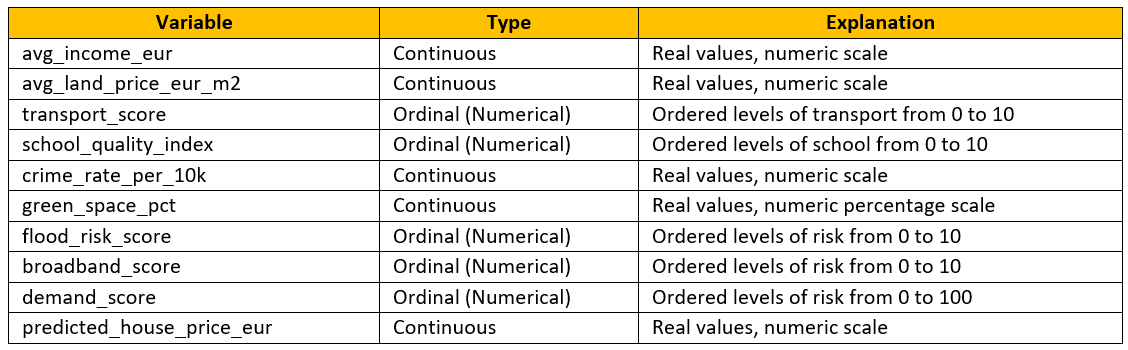

**Categorical Variables**
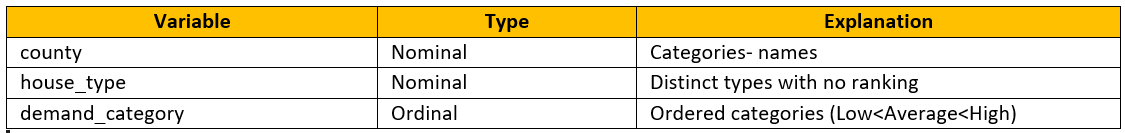

Different data types require different statistical methods and visualisation techniques. For nominal and ordinal data bar charts and frequency counts can be used. Continuous data will be represented by histograms, scatter plots, means and standard deviation. Missing values would be treated differently for numerical data - replaced with mean or median, where categorical data will be imputed with the mode. Outliers are also treated differently for different categories. For numerical values visualisations such as Box Plots and Histograms can be used to represent data distribution and outliers can be removed by applying interquartile range (IQR). Categories can be showed in frequency tables. Bar Charts and Count Plots can represent visualisations. One-Hot Encoder (creates a new binary column for every category) or Label Encoding (assigns a unique integer to each category)  would be used to trasfrom data into numerical values.

Most of this dataset consists of ordinal numbers, which means that data is primarly **categorical with a natural, logical rank or order** *(the_knowledge_academy, 2025)*.
While these categories are represented by numbers (like 0 to 10 on scale), the 'distance' between those numbers is not necessarily equal or quantifiable. Calculating the Mean for **Central Tendency** is generally considered invalid because it assumes equal intervals therefore Median (middle value) and/or Mode (the most frequent) will be used. Instead of Standard Deviation the **Range or Interquartile Range (IQR)** will be applied to describe the spread of the data. A **non-parametric tests** are recommended for the analysis because they do not assume a normal distribution, : to compare groups **Mann-Whitney U** or **Kruskal-Wallis** tests, to find correlation **Spearman's rho** or **Kendall's tau** *(Siegel, 2012)*. 

The **df.isnull()** function scans the entire DataFrame and returns a new DataFrame of the same size, but filled entirely with Boolean avlues: *True* - which is treated as the numerical value 1, or *False* - which is treated as 0. A True value indicates that the cell in the original DataFrame was null/missing, and False mean it contained a valid value *(pandas.DataFrame.isnull, 2025)*.  

In [11]:
# Using finction .isnull().sum() I am checking how many missing values are in each variable
df.isnull().sum()

county                       0
avg_income_eur               3
avg_land_price_eur_m2        0
transport_score              3
school_quality_index         5
crime_rate_per_10k           5
green_space_pct              0
flood_risk_score             3
broadband_score              0
house_type                   0
demand_score                 0
demand_category              0
predicted_house_price_eur    0
dtype: int64

In [12]:
## Here we will check the percentage of nan values present in each feature
## 1 -step making the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]
## 2- step printing the feature name and the percentage of missing values
# if the percentage of missing values is low/insignifficant those rows could be dropped

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 6),  ' % missing values')

avg_income_eur 0.001442  % missing values
transport_score 0.001442  % missing values
school_quality_index 0.002404  % missing values
crime_rate_per_10k 0.002404  % missing values
flood_risk_score 0.001442  % missing values


The proportion of missing values will show if the dataset is complete. If the missing data proportion is very low - int his instance its approx 0.002% , which means that the missing data is statistically insignificant. Its presence or absence will not meaningfully impact descriptive statistics, analytical results, or machine learning model performance. The risk of introducing bias is minimal. Data will be checked for distribution and will be replaced with either: **Mean Imputation** - average for normally distributed numerical data, **Median Imputation** - best for numerical data with outliers or skewed distributions, as it is more robust than the mean, **Mode Imputation** - ideal for categorical data to replace nulls with the most frequent category, or dropped *(Firdose, 2023)*.

<Axes: >

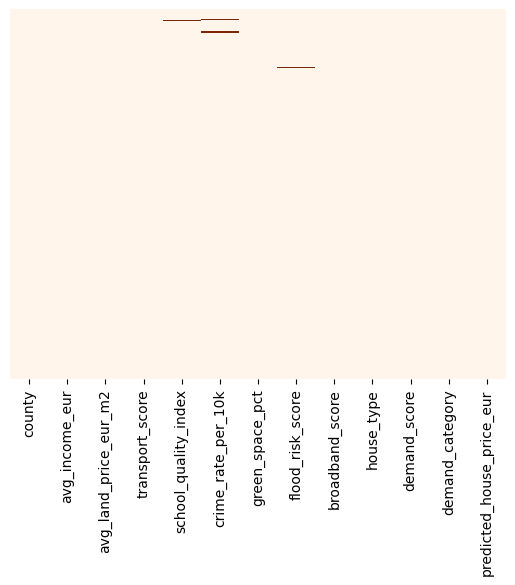

In [13]:
#From the heatmap I can quickly identify Features with most noise, this code will show numerical data only
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Oranges')

In [14]:
df.isnull().mean()*100

county                       0.000000
avg_income_eur               0.144231
avg_land_price_eur_m2        0.000000
transport_score              0.144231
school_quality_index         0.240385
crime_rate_per_10k           0.240385
green_space_pct              0.000000
flood_risk_score             0.144231
broadband_score              0.000000
house_type                   0.000000
demand_score                 0.000000
demand_category              0.000000
predicted_house_price_eur    0.000000
dtype: float64

Checking if dataframe contains **infinity values**, as those values can cause mathematical errors during the analysis *(Sandeep, 2025)*. 

In [15]:
inf_check = np.isinf(df.select_dtypes(include = ['float64'])).sum().sum()
print(f"Infinite values found: {inf_check}")

Infinite values found: 0


In [16]:
# checking/printing all columns with their unique values
for col in df.columns:    # iterate through each column name in the DataFrame
    print(f"\n-{col}-")  # Prints the current column's name as a header for clarity
    print(df[col].sort_values().unique()) # reaorders the data in that specific column in ascending order and returns only the distinct (unique) values


-county-
['Carlow' 'Cavan' 'Clare' 'Cork' 'Donegal' 'Dublin' 'Galway' 'Kerry'
 'Kildare' 'Kilkenny' 'Laois' 'Leitrim' 'Limerick' 'Longford' 'Louth'
 'Mayo' 'Meath' 'Monaghan' 'Offaly' 'Roscommon' 'Sligo' 'Tipperary'
 'Waterford' 'Westmeath' 'Wexford' 'Wicklow']

-avg_income_eur-
[20000.   20247.28 20394.11 ... 54623.46 55124.8       nan]

-avg_land_price_eur_m2-
[ 10.    10.52  11.16 ... 359.98 384.73 390.44]

-transport_score-
[ 1.    1.06  1.08  1.13  1.25  1.31  1.36  1.41  1.49  1.53  1.55  1.58
  1.59  1.6   1.61  1.65  1.66  1.67  1.69  1.71  1.72  1.75  1.77  1.78
  1.8   1.81  1.83  1.84  1.86  1.88  1.89  1.9   1.91  1.93  1.96  1.98
  1.99  2.03  2.04  2.09  2.1   2.13  2.14  2.15  2.16  2.18  2.19  2.2
  2.23  2.24  2.25  2.28  2.31  2.32  2.33  2.34  2.36  2.37  2.39  2.4
  2.41  2.42  2.43  2.44  2.45  2.47  2.49  2.5   2.53  2.54  2.55  2.56
  2.57  2.58  2.59  2.61  2.62  2.64  2.65  2.67  2.68  2.71  2.72  2.74
  2.75  2.76  2.78  2.79  2.81  2.83  2.84  2.86  2.87  2.

Checking for and removing **duplicates** int he data is an important cleaning process to avoid biased statistics, inaccurate models, and misleading conclusions. Duplicates skew foundational statistics. If the same observation is counted twice, the mean (average), median, and mode will be incorrect. Also, duplicates increase the total number of observations. 

- **Biase**: duplicates cause the model to see the same data points multiple times.
- **Overfitting**: a model trained on heavily duplicated dataset is likely to overfit, it will show excellent performance on its training data but perform poorly when introduced to new dataset.

Removing duplicates standarises the dataset, ensures the integrity of the analysis, and allows models to learn patterns from unique data rather than memorizing repeated entries.

At this stage dataset shows 0 duplicates however this will be checked again after complex cleaning.

In [17]:
df.duplicated().sum()

0

## Data Clean Up

Checking distribution of numerical columns using histplots and frequencies. Most numerical variables are moderately dispersed (meaning the average value is a reasonably representative indicator of the whole dataset) with some variability in land prices and house prices. House prices are right-skewed, indicating by a maximum value far above the upper quartile.

Avg land price and predicted land price variables are heavy right skew and many outliers, however these outliers are not errors, but valid extreme market conditions.

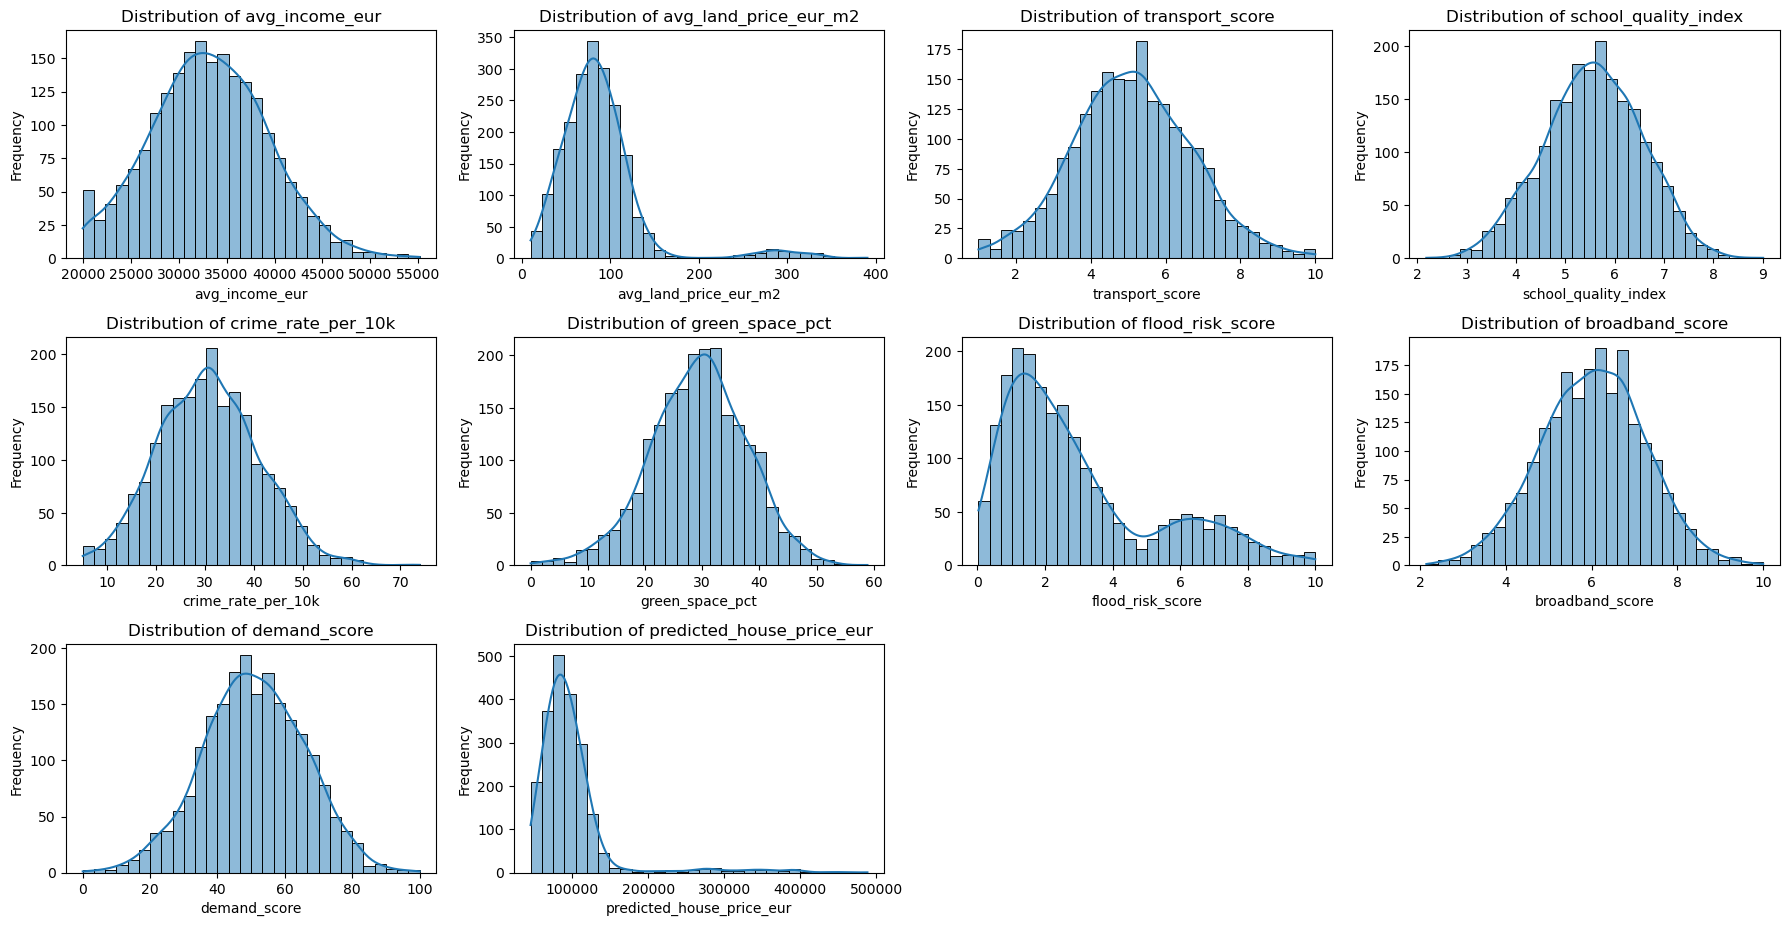

Histograms for key numerical columns generated.


In [18]:
key_numerical_columns =[
    'avg_income_eur','avg_land_price_eur_m2','transport_score','school_quality_index','crime_rate_per_10k','green_space_pct',
    'flood_risk_score','broadband_score','demand_score','predicted_house_price_eur'
]
plt.figure(figsize=(18, 12))
for i, col in enumerate(key_numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col),
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Histograms for key numerical columns generated.")

**Distribution of Predicted House Proces** histplot.

The histogram below illustrates the distribution of predicted house prices (EUR). Prices range up to approximately €500,000; as this is a realistic figure, these values are not considered outliers. Furthermore, the majority of property prices are concentrated around €100,000.

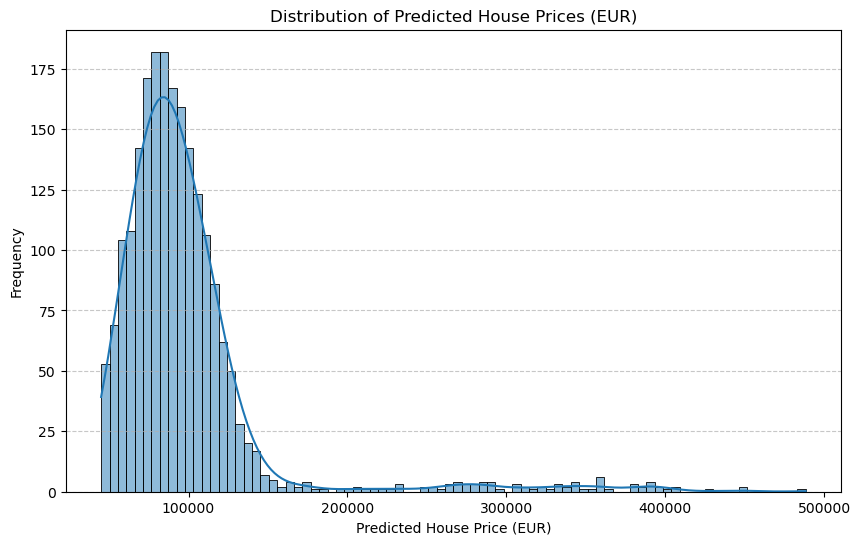

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['predicted_house_price_eur'].dropna(), kde=True)
plt.title('Distribution of Predicted House Prices (EUR)')
plt.xlabel('Predicted House Price (EUR)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Predicted House Price vs. Average Income** scatterplot.

Results from the scatterplot below reveal no strong linear relationship between income and predicted prices. Notably, nearly 99% of properties are concentrated at the €100,000 level, regardless of income, though a small number of scattered datapoints appear above the €200,000 mark. This indicates that the main interest, regardles from income, is around properties value up to €120,000 - €130,000.

Also, most buyers incore vary between €20,000 and €45,000 per annum, with few single buyers with income above €45,000 up to €55,000.

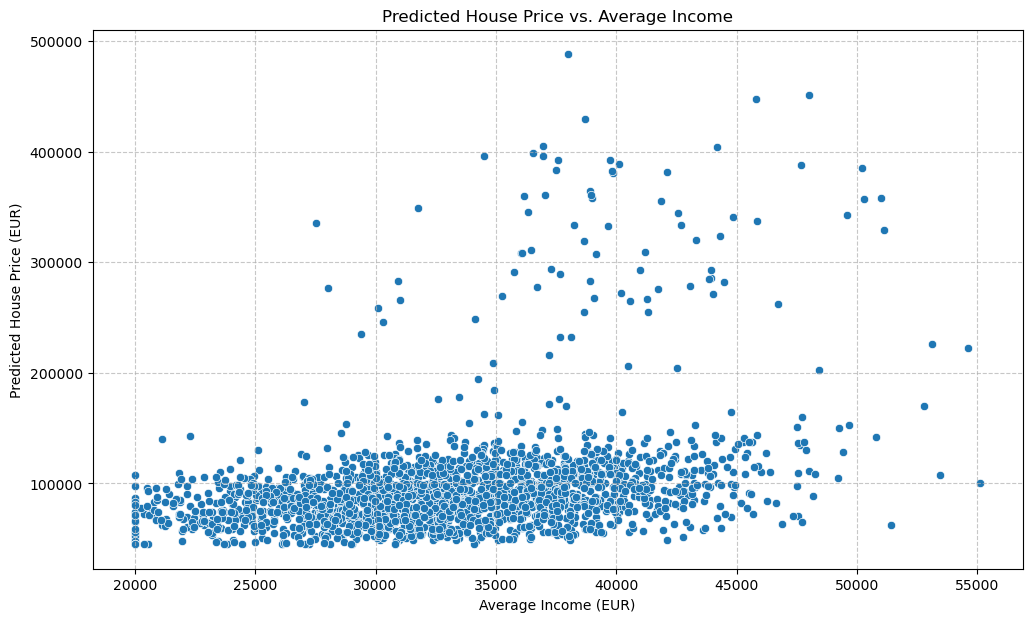

In [20]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['avg_income_eur'], y=df['predicted_house_price_eur'])
plt.title('Predicted House Price vs. Average Income')
plt.xlabel('Average Income (EUR)')
plt.ylabel('Predicted House Price (EUR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

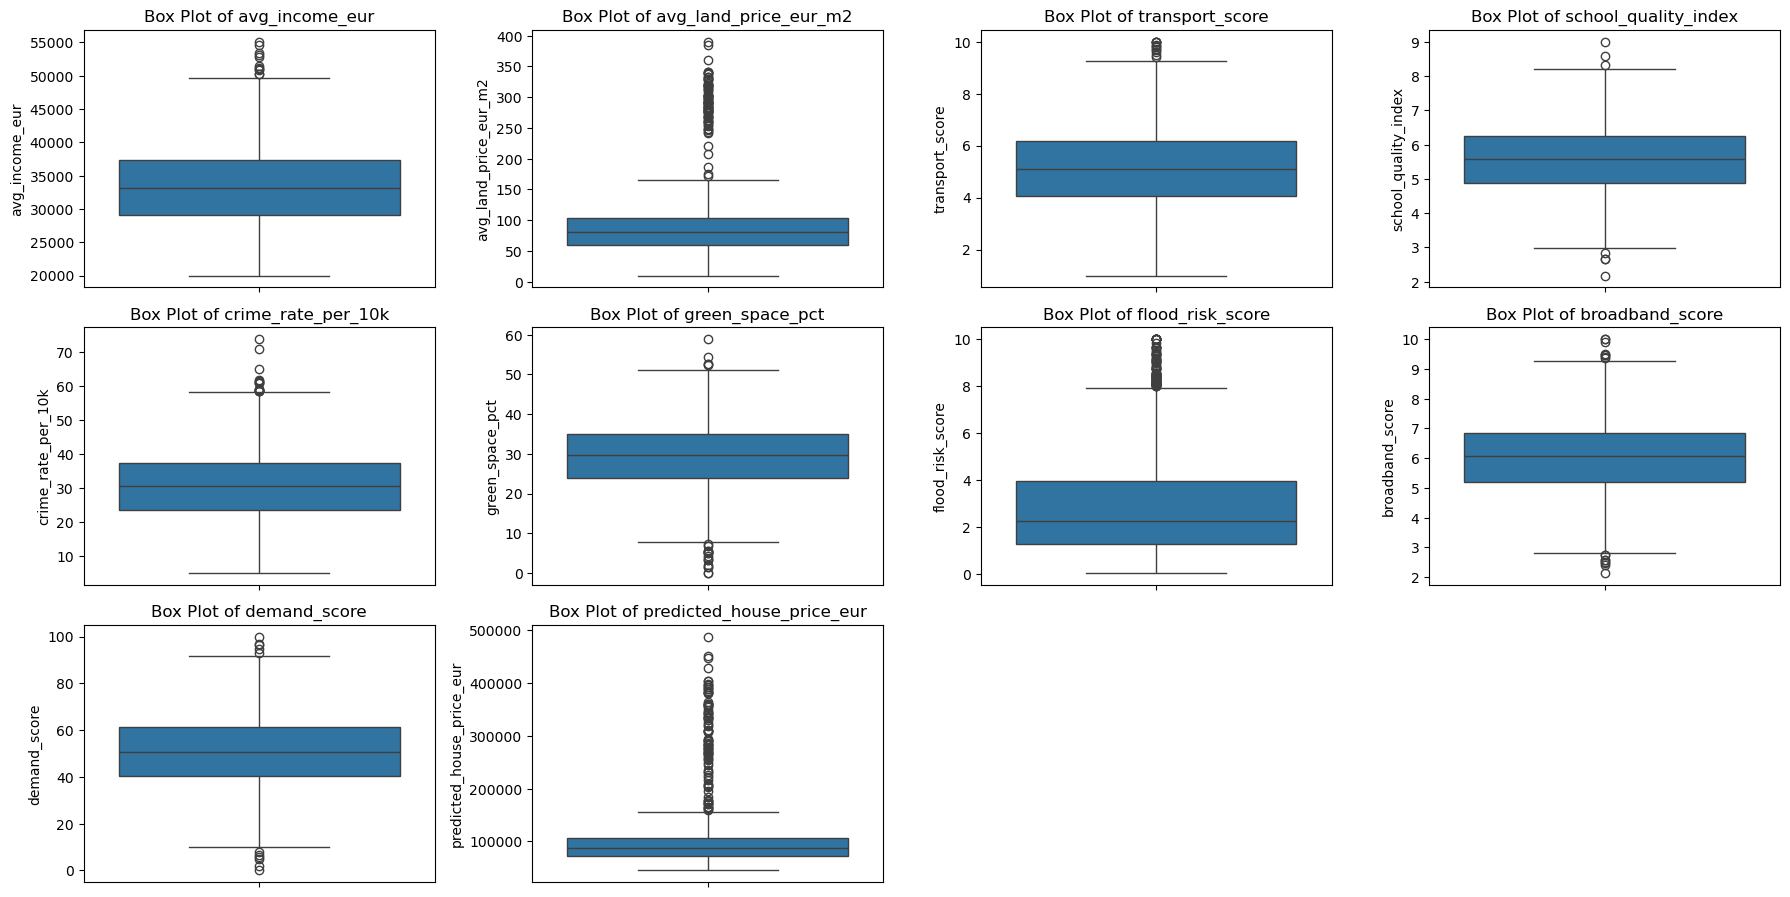

Box plots for key numerical columns generated.


In [21]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(key_numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
print("Box plots for key numerical columns generated.")

**Predicted House Price by House Type** boxplot.

The majority of prices, across all property types, are concentrated around €100,000. More specifically: Studios and apartments are typically priced around €50,000; terraced and semi-detached houses range from €50,000 to €100,000; and bungalows and detached houses fall between €90,000 and €110,000.

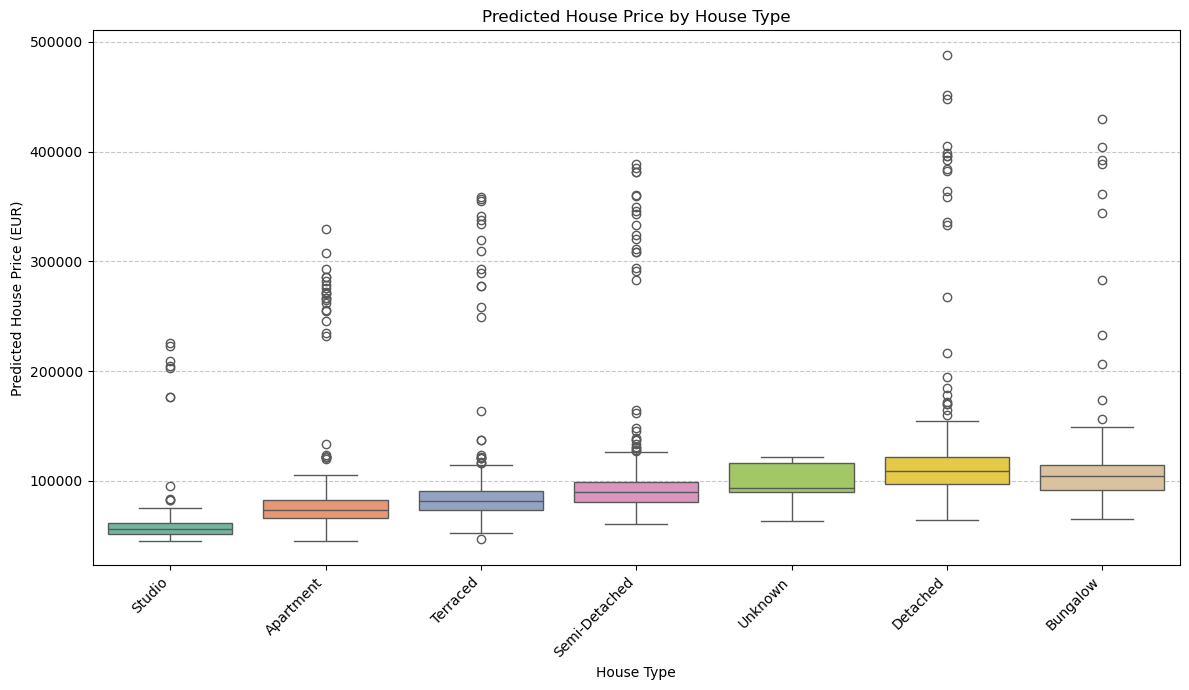

In [22]:
plt.figure(figsize=(12, 7))

sns.boxplot(
    x='house_type', 
    y='predicted_house_price_eur', 
    data=df.sort_values('predicted_house_price_eur'),
    hue='house_type',      # This enables different colors per box
    palette='Set2',        # Different palettes like 'Set2', 'husl', or 'viridis'
)

plt.title('Predicted House Price by House Type')
plt.xlabel('House Type')
plt.ylabel('Predicted House Price (EUR)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
numeric_df = df.select_dtypes(include=np.number) #filterind dataset to include only columns with numerical data
Q1 = numeric_df.quantile(0.25) # calculates the first quartile (25th percentile)
Q3 = numeric_df.quantile(0.75) # calculates the third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range, distance between Q3 and Q1

In [24]:
print(IQR) # Interquartile Range (IQR)

avg_income_eur                8334.840000
avg_land_price_eur_m2           43.337500
transport_score                  2.100000
school_quality_index             1.370000
crime_rate_per_10k              13.995000
green_space_pct                 11.100000
flood_risk_score                 2.660000
broadband_score                  1.630000
demand_score                    20.581236
predicted_house_price_eur    33834.342500
dtype: float64


**Interquartile Range (IQR)** measures the "spread" of the middle 50% of the data.

**1. Financial Indicators:**
- avg_income_eur (8,334.84): the middle 50% of people in this dataset have incomes that vary by about €8,335.00.
- predicted_house_price_eur (33,834.34): it indicates that typical house prices vary by nearly €34,000.
- avg_land_price_eur_m2 (43.34): the cost per square meter of land varies by roughly €43 among the middle half of locations

**2. Quality of Life and Infrastructure:**
- demand_score (20.58): there is wide 20 point gap in demand between moderately popular and very popular areas
- green_space_pct (11.10): the percentage of green space varies by 11% across the central half of areas
- crime_rate_per_10k (13.99): indicates 14 crime incidents per 10,000 people

**3. Low IQR:**
- school_quality_index (1.37): most schools in the middle range areas have very similiar quality scores
- broadband_score (1.63): internet quality is fairly consistent across the majority of the dataset
- transport_score (2.10) & flood_risk_score (2.66): most areas fall within a narrow band of risk and accessibility

*Model Reliabilty*- features with very low IQR (like school quality) may have less 'predictive power' for prediction models, because they don't vary enough to explain differences in house prices.

The **df.describe()** method generates a discriptive summary of the central tendency, dispersion, and shape of the DataFrame's numerical columns, excluding NaN values *(pandas.DataFrame.describe, 2025)*. It provides high-level overview of the distribution of the data.

- **count**: the number of non-null observations in the column
- **mean**: the average value
- **std**: standard deviation (measure of spread or variability)
- **min**: the minimum value
- **25% (Q1)**: the 25th percentile (first quartile) value
- **50% (median)**: the 50th percentile (median) value
- **75% (Q3)**: the 75th percentile (third quartile) value
- **max**: the maximum value 

It helps to spot potential outliers by comparing min and max values to the mean and percentiles, a maximum value exceeding the 75% might indicate an outlier. Its checkes for data consistency and helps understand data distribution by comparing the mean and median (50%) - identifying if the data is symmetrical or skewed. 

In [25]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
county,2080,26,Carlow,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_income_eur,2077.0,NaN,NaN,NaN,33221.66209,6098.363519,20000.0,29029.28,33091.36,37364.12,55124.8
avg_land_price_eur_m2,2080.0,NaN,NaN,NaN,87.895942,50.865574,10.0,59.9275,81.21,103.265,390.44
transport_score,2077.0,NaN,NaN,NaN,5.110558,1.583743,1.0,4.06,5.1,6.16,10.0
school_quality_index,2075.0,NaN,NaN,NaN,5.560255,0.991515,2.18,4.89,5.58,6.26,9.01
crime_rate_per_10k,2075.0,NaN,NaN,NaN,30.752882,10.279688,5.0,23.475,30.6,37.47,73.92
green_space_pct,2080.0,NaN,NaN,NaN,29.394457,8.379302,0.0,23.965,29.675,35.065,58.89
flood_risk_score,2077.0,NaN,NaN,NaN,2.99221,2.309292,0.03,1.27,2.24,3.93,10.0
broadband_score,2080.0,NaN,NaN,NaN,6.032928,1.213262,2.14,5.21,6.06,6.84,10.0
house_type,2080,7,Detached,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Imputing *null* values with the **median** as data contains *outliers* and the *median* is less affected by extreme values.

In [26]:
display(df['avg_income_eur'].describe())

count     2077.000000
mean     33221.662090
std       6098.363519
min      20000.000000
25%      29029.280000
50%      33091.360000
75%      37364.120000
max      55124.800000
Name: avg_income_eur, dtype: float64

In [27]:
display(df['transport_score'].describe())

count    2077.000000
mean        5.110558
std         1.583743
min         1.000000
25%         4.060000
50%         5.100000
75%         6.160000
max        10.000000
Name: transport_score, dtype: float64

In [28]:
display(df['school_quality_index'].describe())

count    2075.000000
mean        5.560255
std         0.991515
min         2.180000
25%         4.890000
50%         5.580000
75%         6.260000
max         9.010000
Name: school_quality_index, dtype: float64

In [29]:
display(df['crime_rate_per_10k'].describe())

count    2075.000000
mean       30.752882
std        10.279688
min         5.000000
25%        23.475000
50%        30.600000
75%        37.470000
max        73.920000
Name: crime_rate_per_10k, dtype: float64

In [30]:
display(df['flood_risk_score'].describe())

count    2077.000000
mean        2.992210
std         2.309292
min         0.030000
25%         1.270000
50%         2.240000
75%         3.930000
max        10.000000
Name: flood_risk_score, dtype: float64

In [31]:
df['avg_income_eur']=df['avg_income_eur'].fillna(df['avg_income_eur'].median())

In [32]:
df['transport_score']=df['transport_score'].fillna(df['transport_score'].median())

In [33]:
df['school_quality_index']=df['school_quality_index'].fillna(df['school_quality_index'].median())

In [34]:
df['crime_rate_per_10k']=df['crime_rate_per_10k'].fillna(df['crime_rate_per_10k'].median())

In [35]:
df['flood_risk_score']=df['flood_risk_score'].fillna(df['flood_risk_score'].median())

*null* values have been replaced with *median*

In [36]:
df.isnull().mean()*100

county                       0.0
avg_income_eur               0.0
avg_land_price_eur_m2        0.0
transport_score              0.0
school_quality_index         0.0
crime_rate_per_10k           0.0
green_space_pct              0.0
flood_risk_score             0.0
broadband_score              0.0
house_type                   0.0
demand_score                 0.0
demand_category              0.0
predicted_house_price_eur    0.0
dtype: float64

Slight reduction of *STD* is recorded on 'avg_income_eur' variable from 6098.36 to 6093.96 which represents reduction of approximetly 0.08% in variability.  

In [37]:
display(df['avg_income_eur'].describe())

count     2080.000000
mean     33221.474154
std       6093.963964
min      20000.000000
25%      29029.715000
50%      33091.360000
75%      37361.600000
max      55124.800000
Name: avg_income_eur, dtype: float64

In [38]:
display(df['transport_score'].describe())

count    2080.000000
mean        5.110543
std         1.582600
min         1.000000
25%         4.060000
50%         5.100000
75%         6.160000
max        10.000000
Name: transport_score, dtype: float64

In [39]:
display(df['school_quality_index'].describe())

count    2080.000000
mean        5.560303
std         0.990322
min         2.180000
25%         4.890000
50%         5.580000
75%         6.260000
max         9.010000
Name: school_quality_index, dtype: float64

In [40]:
display(df['crime_rate_per_10k'].describe())

count    2080.000000
mean       30.752514
std        10.267322
min         5.000000
25%        23.480000
50%        30.600000
75%        37.460000
max        73.920000
Name: crime_rate_per_10k, dtype: float64

In [41]:
display(df['flood_risk_score'].describe())

count    2080.000000
mean        2.991125
std         2.307802
min         0.030000
25%         1.270000
50%         2.240000
75%         3.922500
max        10.000000
Name: flood_risk_score, dtype: float64

In [42]:
# The demand score column shows values from 0 to 100% score. The actual numerical values can be rounded to 2 decimal places.
df['demand_score']=df['demand_score'].round(2)

In [43]:
print(df['demand_score'])

0       64.45
1       36.74
2       36.58
3       65.91
4       44.82
        ...  
2075    46.33
2076    25.26
2077    45.36
2078    40.63
2079    69.32
Name: demand_score, Length: 2080, dtype: float64


The **df.describe(include=object)** generates descriptive statistics for all columns that have the *object* data type (text or mixed data, non-numeric categorical data). Theresult is frequencies and counts instead of numerical measures like mean and standard deviation. For each column, four metrics are produced:

- **count**: the number of non-null entries
- **unique**: total number of distinct categories or unique values
- **top**: the most frequent value or category
- **freq**: the frequency (count) of the most frequent value

In [44]:
df.describe(include=object)

,county,house_type,demand_category
count,2080,2080,2080
unique,26,7,3
top,Carlow,Detached,Average
freq,80,516,1510


The Variable **"demand_category"** has three categories: *Low, Average and High*. Out of 2,080 observations, 1,510 belong to the *"Average"* category. This corresponds to approx ~73% of the entire dataset. The remaining ~27% of observations are split between *"Low"* and *"High"* demand categories. Consequently, the dataset is dominated by *"Average"* demand areas, which may affect predictive modelling.

The dataset is imbalanced with one category occuring far more frequently that the others. 
 - Descriptive analysis: Summary statistics and trends will largely reflect characteristics of *"Average"* demand areas rather than *"Low" or "High"*.
 - Predictive modelling: a classification model trained on this data amy become biased toward predicting *"Average"* demand, simply because it appears most often.
 - Evaluation metrics: a model predicting *"Average"* for most cases may appear accurate but perform poorly on minority classes.
 - *'High-demand'* and *'Low-demand'* areas are **under-represnted** which can limit insights into premium housing markets and economically disadvantaged areas. patterns unique to these groups may be harder to detect statistically.

This issue can be addressed by using **stratified sampling** in train/test splits, by applying **class weighting** in models, using **resampling techniques- oversampling or undersampling** or report **precision, recall,and F1-score** instead of accuracy alone.

In [45]:
print(df['county'].value_counts())

county
Carlow       80
Cavan        80
Wexford      80
Westmeath    80
Waterford    80
Tipperary    80
Sligo        80
Roscommon    80
Offaly       80
Monaghan     80
Meath        80
Mayo         80
Louth        80
Longford     80
Limerick     80
Leitrim      80
Laois        80
Kilkenny     80
Kildare      80
Kerry        80
Galway       80
Dublin       80
Donegal      80
Cork         80
Clare        80
Wicklow      80
Name: count, dtype: int64


'house_type' variable contains 9 unknown values which will be retained as a separate category to preserve data integrity and avoid introducing bias through additional imputations. Removing these rows would discard otherwise useful data. All 2,080 observations must be preserved.

In [46]:
print(df['house_type'].value_counts())

house_type
Detached         516
Apartment        425
Semi-Detached    408
Terraced         313
Bungalow         212
Studio           197
Unknown            9
Name: count, dtype: int64


In [47]:
print(df['demand_category'].value_counts())

demand_category
Average    1510
High        339
Low         231
Name: count, dtype: int64


## EDA Visualizations

**Distribution of Demand Category** in the dataset.

73% of the dataset contain details of houses prices predictions of *Average* demand, 16% of *High* demand and only 11% of *Low* demand.

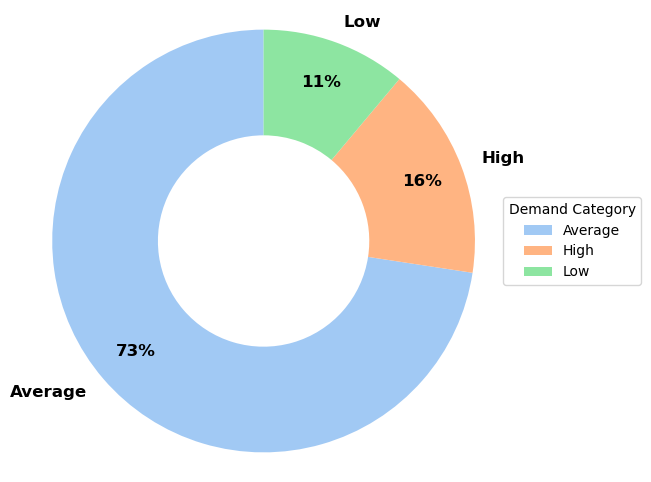

In [48]:
# Setup data    (Sandeep, 2025)
counts = df['demand_category'].value_counts()
labels = counts.index
colors = sns.color_palette('pastel')[0:len(labels)] # Soft, modern palette
explode = [0.05] * len(labels) # Subtle separation of slices

fig, ax = plt.subplots(figsize=(6,6)) # larger figure size

wedges, texts, autotexts = ax.pie(       # (Singh, 2022)
    counts,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct='%.0f%%',
    pctdistance=0.80,
    wedgeprops=dict(width=0.5),
    textprops={'fontsize': 12, 'fontweight' : 'bold'}
)

ax.axis('equal') 

ax.legend(wedges, labels, title="Demand Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**House Type** distribution in the dataset.

The most popular ate *Detached* houses, followed by *Aprtments*, *Semi-Detached* houses, *Terrace* homes, with the least popular *Bungalows* and *Studios*.

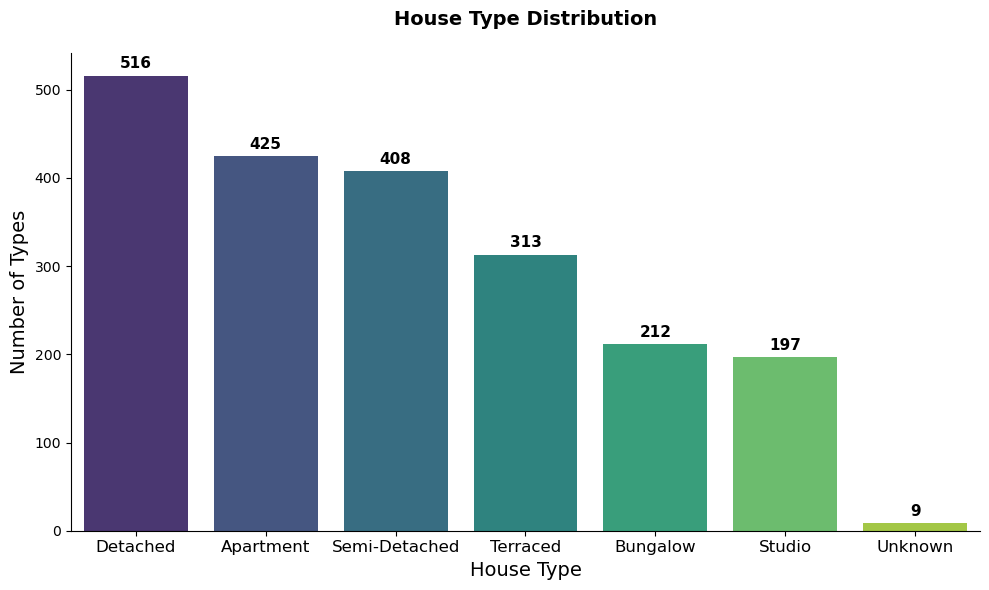

In [49]:
plt.figure(figsize=(10,6))

#'order' parameter to sort from highest to lowest
ax = sns.countplot(
    data=df, 
    x='house_type', 
    palette='viridis',
    order=df['house_type'].value_counts().index 
)
# House types names size
ax.tick_params(axis='x',labelsize=12)

# Adding value labels on top of bars    (yellow_dot, 2025)
for container in ax.containers:
 ax.bar_label(container, padding = 3, fontsize =11, fontweight ='bold') 

plt.title('House Type Distribution', fontsize=14, fontweight='bold',pad=20)
plt.xlabel('House Type', fontsize=14)
plt.ylabel('Number of Types', fontsize=14)
# Removing top and right spine
sns.despine()

plt.tight_layout()
plt.show()

**Average Land Price per County** bar plot.

Average of the most expensive land within this dataset is withing the Dublin region -€294.00 per m2. For the remaining counties the price is at least 3 times lower with small variation between €88.00 and €75.00.

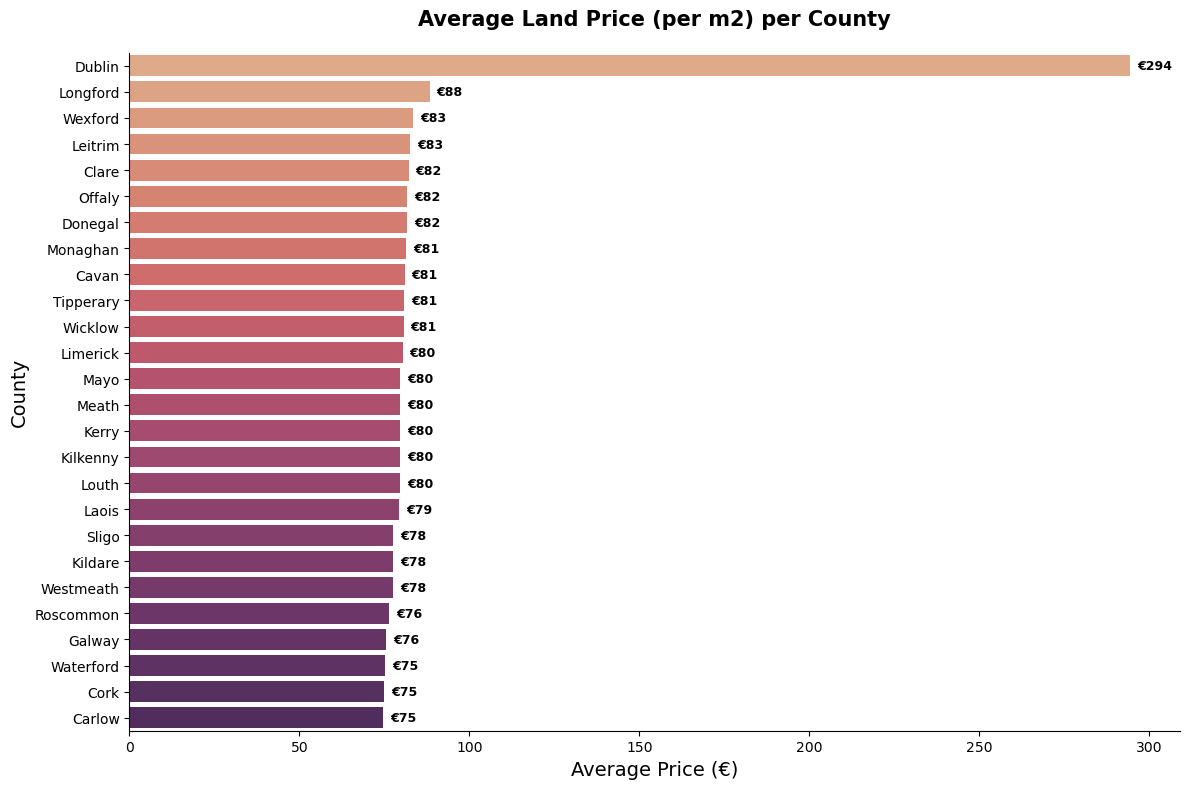

In [50]:
# sorting the data from highest to lowest
avg_prices=df.groupby('county')['avg_land_price_eur_m2'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))

# horisontal bar plot for readability
ax = sns.barplot(
    x=avg_prices.values,
    y=avg_prices.index,
    hue=avg_prices.index,
    palette='flare' # gradient palette
)

# adding price labels to the end of each bar
for container in ax.containers:
 ax.bar_label(container, fmt='€%.0f', padding=5, fontsize=9, fontweight='bold')

plt.title('Average Land Price (per m2) per County', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Average Price (€)', fontsize=14)
plt.ylabel('County', fontsize=14)

# Removing top and right spine
sns.despine()

plt.tight_layout()
plt.show()

In [51]:
# Checking maximum average prices of land per county
avg_prices=df.groupby('county')['avg_land_price_eur_m2'].max().sort_values(ascending=False)
print(avg_prices)

county
Dublin       390.44
Meath        186.69
Longford     175.60
Leitrim      172.03
Offaly       165.41
Cavan        160.63
Mayo         156.35
Monaghan     156.25
Cork         155.35
Tipperary    155.11
Roscommon    152.03
Clare        150.00
Laois        149.00
Westmeath    145.20
Waterford    144.74
Donegal      144.49
Wexford      143.86
Kerry        142.63
Limerick     141.09
Sligo        141.01
Wicklow      140.50
Kilkenny     140.41
Louth        138.25
Carlow       136.60
Galway       136.42
Kildare      129.59
Name: avg_land_price_eur_m2, dtype: float64


In [52]:
# top income for buyers accross all counties is very similiar
avg_prices=df.groupby('county')['avg_income_eur'].max().sort_values(ascending=False)
print(avg_prices)

county
Waterford    55124.80
Dublin       54623.46
Sligo        53448.30
Longford     52805.83
Monaghan     51428.02
Cavan        50790.06
Carlow       49669.88
Kerry        49261.99
Limerick     48276.33
Laois        48019.03
Louth        47883.91
Westmeath    47811.51
Meath        47552.48
Kilkenny     47510.35
Roscommon    47357.42
Offaly       46368.93
Mayo         46219.86
Leitrim      46027.16
Tipperary    45898.90
Wicklow      45708.40
Clare        45660.81
Galway       45592.39
Cork         45281.17
Donegal      45166.44
Wexford      44948.81
Kildare      43626.13
Name: avg_income_eur, dtype: float64


**Top Annual Income per County** bar plot.

The top income for all counties slightly vary between €43,626.13 and €55,124.80 with top earners in Waterford.

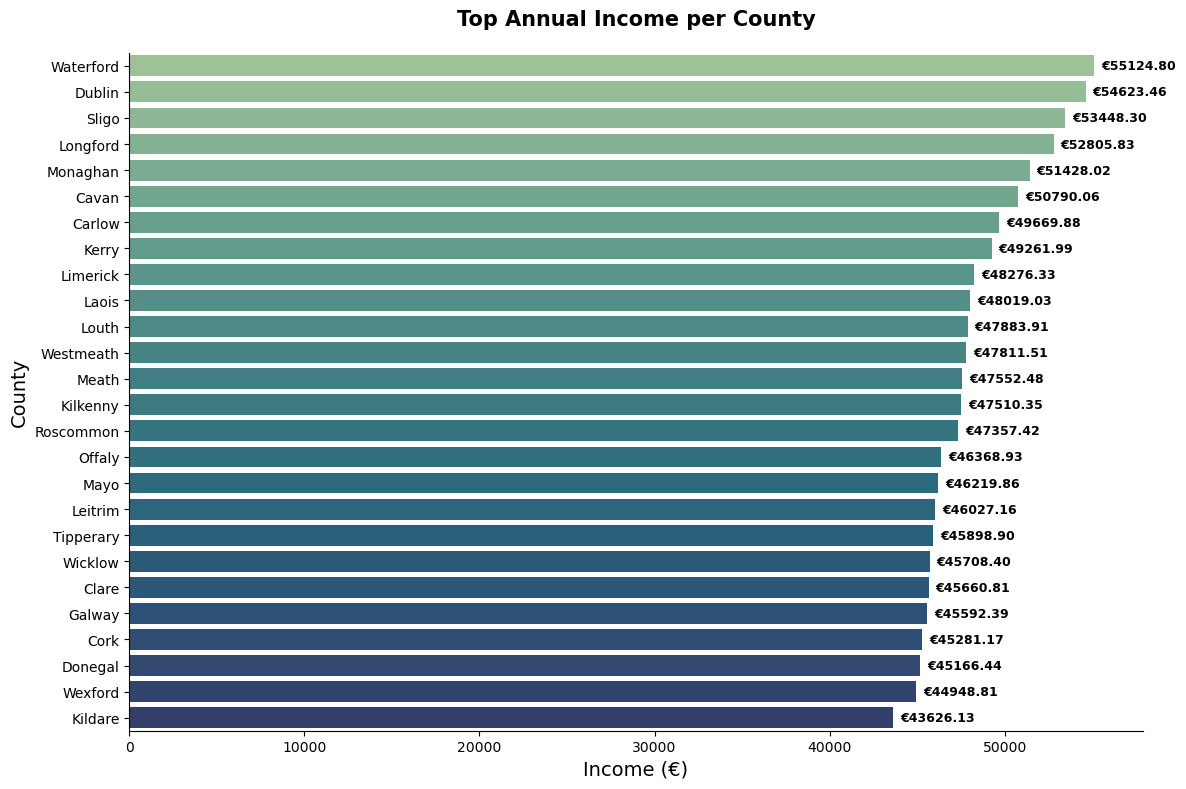

In [53]:
plt.figure(figsize=(12,8))

# horisontal bar plot for readability
ax = sns.barplot(
    x=avg_prices.values,
    y=avg_prices.index,
    hue=avg_prices.index,
    palette='crest' # gradient palette
)

# adding price labels to the end of each bar
for container in ax.containers:
 ax.bar_label(container, fmt='€%.2f', padding=5, fontsize=9, fontweight='bold')

plt.title('Top Annual Income per County', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Income (€)', fontsize=14)
plt.ylabel('County', fontsize=14)

# Removing top and right spine
sns.despine()

plt.tight_layout()
plt.show()

In [54]:
high_earners = df[df['avg_income_eur']>40000].groupby('county').size().sort_values(ascending=False)
print(high_earners)

county
Dublin       36
Kerry        18
Louth        14
Offaly       13
Longford     12
Cork         12
Monaghan     11
Cavan        10
Sligo        10
Mayo         10
Carlow       10
Kilkenny     10
Limerick      9
Roscommon     9
Waterford     9
Leitrim       8
Meath         8
Donegal       8
Clare         8
Wicklow       8
Galway        7
Westmeath     7
Kildare       6
Tipperary     6
Wexford       6
Laois         5
dtype: int64


**Number of High Earners (> €40k) by County** bar graph.

The highest number of top earners of over €40,000 per annum is for Dublin region, followed by Kerry, Louth and Offaly.

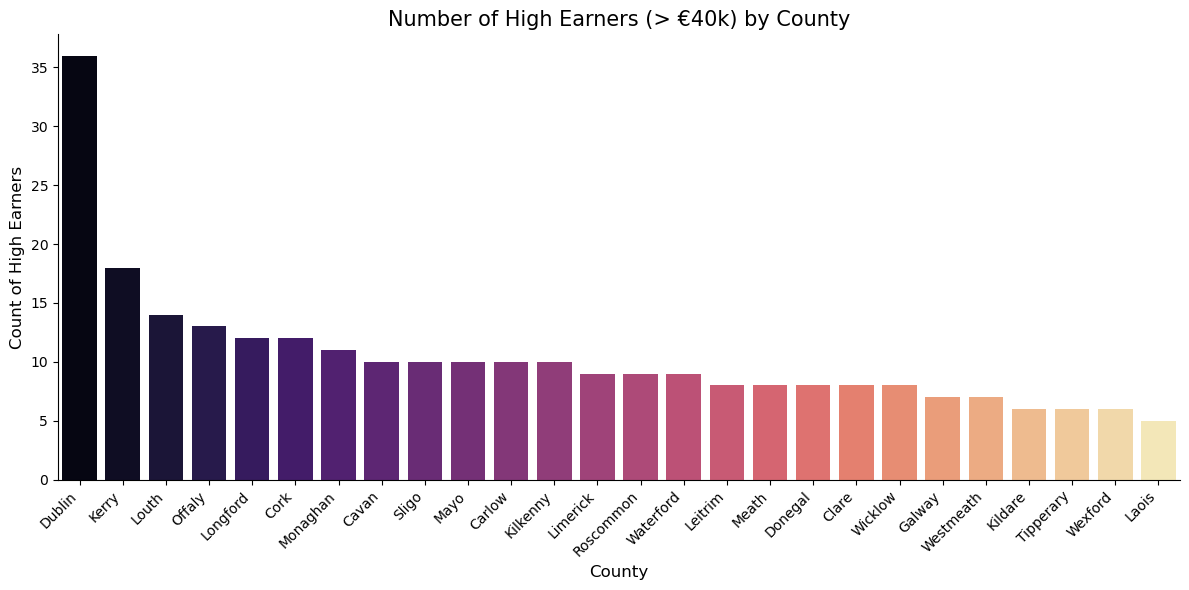

In [55]:
high_earners = df[df['avg_income_eur'] > 40000].groupby('county').size().sort_values(ascending=False)

# Creating the visualization
plt.figure(figsize=(12, 6))

# Using Seaborn for automatic styling and coloring
sns.barplot(
    x=high_earners.index, 
    y=high_earners.values, 
    hue=high_earners.index,
    palette='magma', 
    legend=False
)

# Adding labels and title
plt.title('Number of High Earners (> €40k) by County', fontsize=15)
plt.xlabel('County', fontsize=12)
plt.ylabel('Count of High Earners', fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')

# Removing top and right spine
sns.despine()

plt.tight_layout()
plt.show()

**Top/Highest Predicted House Price by County** bar graph.

The most expensive houses prices are predicted for Dublin region, followed by Galway, Cork and Longford.

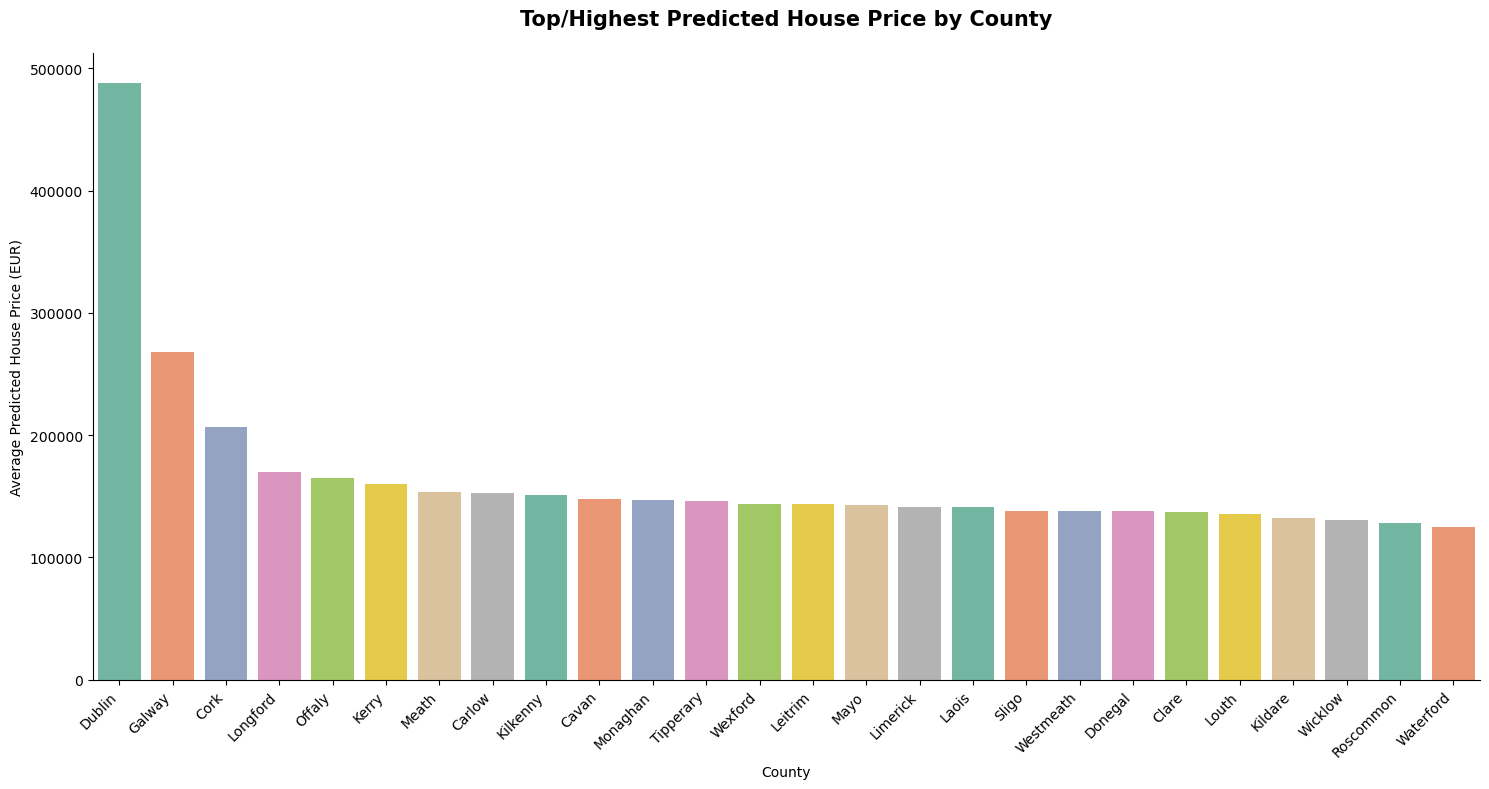

In [56]:
avg_price_by_county = df.groupby('county')['predicted_house_price_eur'].max().sort_values(ascending=False)

plt.figure(figsize=(15, 8))

# Added hue and legend=False to avoid future version warnings
sns.barplot(
    x=avg_price_by_county.index, 
    y=avg_price_by_county.values, 
    hue=avg_price_by_county.index, 
    palette='Set2', 
    legend=False
)

plt.title('Top/Highest Predicted House Price by County', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('County')
plt.ylabel('Average Predicted House Price (EUR)')

# Changed rotation to 45 and added ha='right' for better alignment
plt.xticks(rotation=45, ha='right')

# Removing top and right spine
sns.despine()

plt.tight_layout()
plt.show()

In [57]:
top_scores_by_county = df.groupby('county')[['transport_score', 'school_quality_index', 'flood_risk_score', 'broadband_score']].max()
display(top_scores_by_county.sort_values(by='broadband_score', ascending=False))

,transport_score,school_quality_index,flood_risk_score,broadband_score
county,,,,
Dublin,10.00,7.78,10.00,10.00
Galway,8.74,7.46,10.00,9.89
Roscommon,8.08,7.91,5.00,9.45
Mayo,7.64,7.57,6.30,9.36
Kildare,8.71,8.58,6.45,9.24
Longford,8.66,7.45,4.40,9.23
Laois,8.17,7.68,6.01,9.16
Carlow,8.12,7.96,6.27,9.03
Wicklow,8.52,7.94,5.79,8.89


In [58]:
top_scores_by_county = df.groupby('county')[['transport_score', 'school_quality_index', 'flood_risk_score', 'broadband_score']].mean()
display(top_scores_by_county.sort_values(by='broadband_score', ascending=False))

,transport_score,school_quality_index,flood_risk_score,broadband_score
county,,,,
Dublin,7.667000,6.034875,6.956625,7.020125
Louth,5.156875,5.367125,1.950125,6.331375
Monaghan,5.264750,5.521375,1.888500,6.192125
Cork,4.932625,5.573875,7.164250,6.141750
Carlow,4.588250,5.690000,2.101125,6.133875
Tipperary,5.135250,5.521875,2.018875,6.081250
Cavan,4.873250,5.454500,1.861250,6.069375
Mayo,5.170375,5.491000,1.925500,6.062250
Longford,5.223375,5.505250,1.859375,6.036500


**Mean Quality Scores by County (Sorted by Broadband)** line graph.

While a bar chart is often used for categorical data like counties, a line graph (specially a multi-line plot) is excellent for showing how different metrics (broadband, school quality, etc.) compare across the same set of locations. 

We can clearly identify counties with highest:
1. **flood risk**score: Dublin, Cork, Galway, Wexford, Waterford
2. **broadband** score: Dublin, Louth and Monaghan
3. **school quality** score: Kildare, Dublin and Meath
4. **transport** score: Dublin

Flood risk scores demonstrate a bimodal distribution: they are either very high (score 7) or very low (around score 2). The broadband scores are nearly identical across all counties. School quality varies slightly, ranging between 5.5 and 6 points, while the transport scores show a similarly minor variation, from 4.5 to 5.3 amongst all counties.

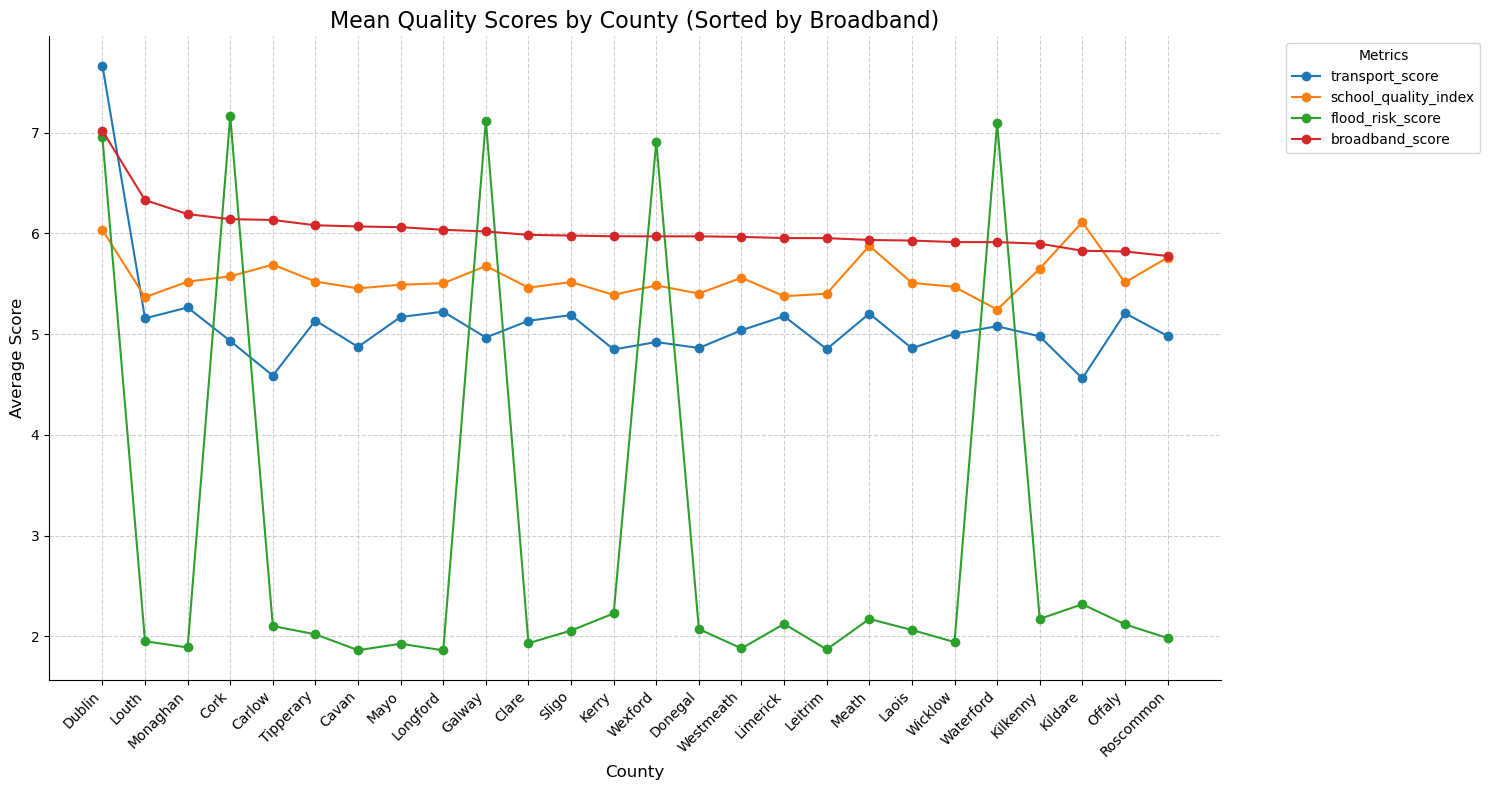

In [59]:
# plotting graph based on the above analysis, sorting resuls based on broadband score
top_scores_plot = top_scores_by_county.sort_values(by='broadband_score', ascending=False)

# Creating the line plot
plt.figure(figsize=(15, 8))

# Pandas .plot() will automatically create a separate colored line for each column, counties on the X-axis
top_scores_plot.plot(kind='line', marker='o', ax=plt.gca())

# Labels
plt.title('Mean Quality Scores by County (Sorted by Broadband)', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Average Score', fontsize=12)

# Rotating city/county names for readability
plt.xticks(range(len(top_scores_plot.index)), top_scores_plot.index, rotation=45, ha='right')

# Adding grid for easier tracking of values across lines
plt.grid(True, linestyle='--', alpha=0.6)

# Placing legend outside to keep the chart clean
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Removing top and right spine
sns.despine()

plt.tight_layout()
plt.show()

In [60]:
top_scores_by_house_type = df.groupby('house_type')[['transport_score', 'school_quality_index', 'flood_risk_score', 'broadband_score']].mean()
display(top_scores_by_house_type.sort_values(by='broadband_score', ascending=False))

,transport_score,school_quality_index,flood_risk_score,broadband_score
house_type,,,,
Unknown,4.815556,5.450000,2.441111,6.308889
Studio,5.130761,5.608985,2.840558,6.138122
Apartment,5.066353,5.513718,3.213812,6.064918
Detached,5.108702,5.571725,2.914419,6.062209
Semi-Detached,5.041324,5.543088,3.016936,6.025858
Terraced,5.266486,5.582173,3.006997,5.960064
Bungalow,5.100330,5.586179,2.821557,5.909245


**Mean Quality Scores by House Type (Sorted by Broadband)** line graph.

The average score for transport, broandband and school is very high and similiar for all properties, with the highest scores for broadband approx 6 points, school quality index - approx 5.5 points and transport score - 5 points. The lowest score is observed for flood risk between 2.5 to 3.5 points. Which indicates that broadband quality is very good (property type do not influence the broadband quality) and flooding risk (property type to not influence the flooding risk) is very low for all types of properties.

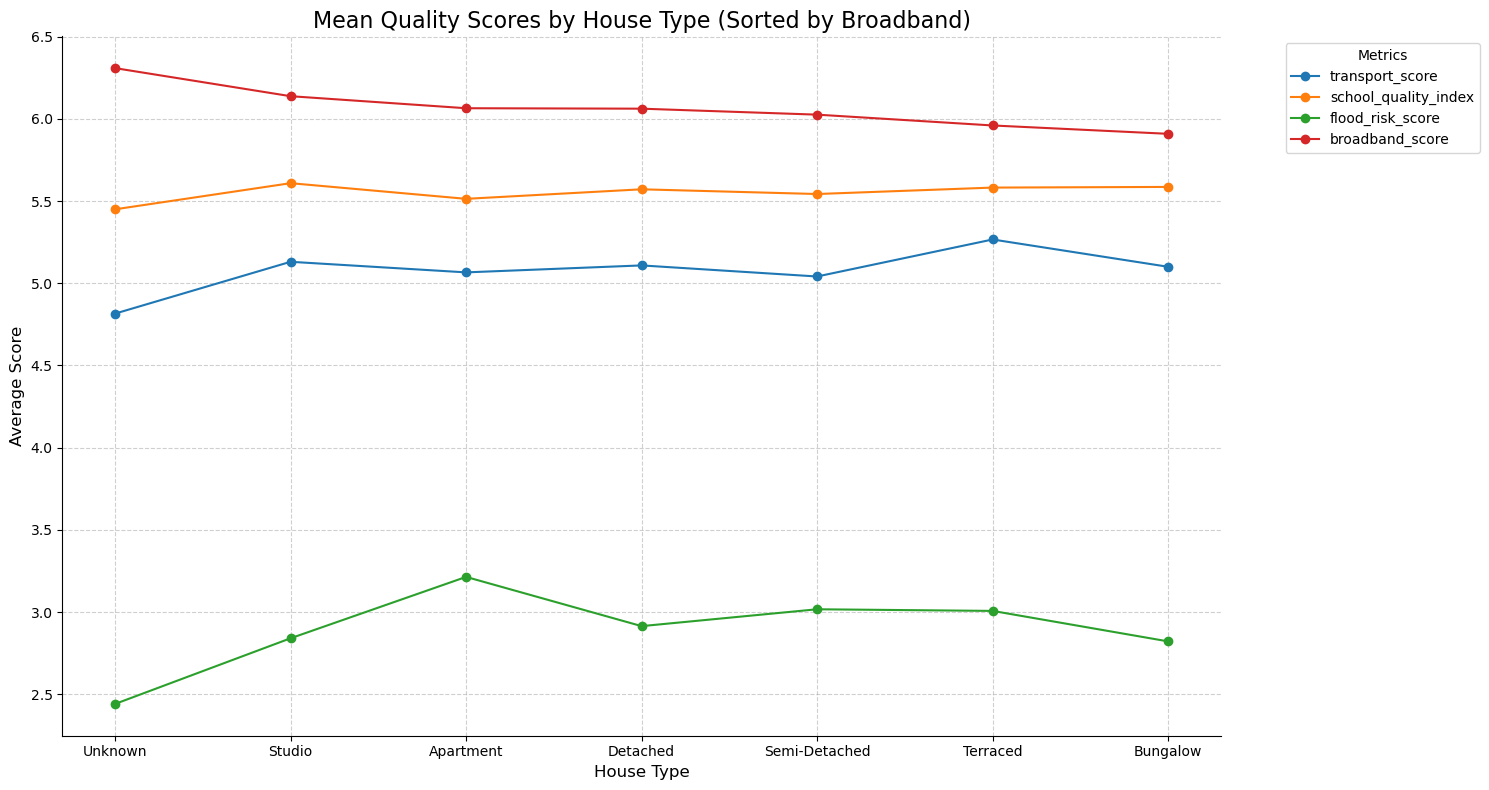

In [61]:
# plotting graph based on the above analysis, sorting resuls based on broadband score
top_scores_plot_2 = top_scores_by_house_type.sort_values(by='broadband_score', ascending=False)

# Creating the line plot
plt.figure(figsize=(15, 8))

# Pandas .plot() will automatically create a separate colored line for each column, counties on the X-axis
top_scores_plot_2.plot(kind='line', marker='o', ax=plt.gca())

# Labels
plt.title('Mean Quality Scores by House Type (Sorted by Broadband)', fontsize=16)
plt.xlabel('House Type', fontsize=12)
plt.ylabel('Average Score', fontsize=12)

# Adding grid for easier tracking of values across lines
plt.grid(True, linestyle='--', alpha=0.6)

# Placing legend outside to keep the chart clean
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Removing top and right spine
sns.despine()

plt.tight_layout()
plt.show()

## Categorical Data Encoding

The categorical data must be prepared, so statistical models can process categorical information correctly, using **encoding** methods: **One-Hot Encoder** -  for nominal data (categories with order)this type of encoding transforms each categorical feature into binary features (1,0) this method creates additional columns, **Ordinal Encoding** - for ordinal data (categories with order like 'small','medium','large'), the data is converted to an ordered numerical scale: 0,1,2. or **Label Encoder** method which is assigning integers: 0,1,2.. based on alphabetical order of the labels, not the logical sequence *(PreprocessingData, 2007-2025)*. 

**Label Encoder** will be eused on 'county' and 'house-type' columns and those contain several different categories. 
**Ordinal Encoding** will be used on 'demand_category' column to convert logical sequence: Low-> Average-> High, into numerical hierarhy of the data.

In [62]:
#importing libraries
from sklearn.preprocessing import LabelEncoder

In [63]:
#creating a copy- new dataset
new_df=df.copy()
new_df.head()

,county,avg_income_eur,avg_land_price_eur_m2,transport_score,school_quality_index,crime_rate_per_10k,green_space_pct,flood_risk_score,broadband_score,house_type,demand_score,demand_category,predicted_house_price_eur
0,Carlow,35980.28,75.85,5.97,7.02,27.66,28.13,3.18,5.44,Apartment,64.45,Average,78098.14
1,Carlow,29571.72,52.28,1.08,6.45,38.16,17.81,1.68,5.24,Semi-Detached,36.74,Average,73503.34
2,Carlow,29733.70,83.33,3.27,5.88,23.99,27.67,0.67,6.99,Terraced,36.58,Average,75004.94
3,Carlow,49669.88,115.81,5.33,6.38,19.91,17.33,3.15,4.64,Detached,65.91,Average,152940.93
4,Carlow,28938.47,98.35,6.55,6.43,21.61,27.53,1.66,4.67,Detached,44.82,Average,107326.78


In [64]:
#label Encoding for 'county' and 'house_type' columns
le_county=LabelEncoder()
new_df['county_enc']=le_county.fit_transform(new_df['county'])

In [65]:
display(new_df[['county','county_enc']].head())

,county,county_enc
0,Carlow,0
1,Carlow,0
2,Carlow,0
3,Carlow,0
4,Carlow,0


In [66]:
le_county=LabelEncoder()
new_df['house_type_enc']=le_county.fit_transform(new_df['house_type'])

In [67]:
display(new_df[['house_type','house_type_enc']].head())

,house_type,house_type_enc
0,Apartment,0
1,Semi-Detached,3
2,Terraced,5
3,Detached,2
4,Detached,2


In [68]:
# importing libraries
from sklearn.preprocessing import OrdinalEncoder

In [69]:
#defining the order for ordinal encoding
demand_category_order=['Low','Average','High']

In [70]:
oe_demand_category = OrdinalEncoder(categories=[demand_category_order])
new_df['demand_category_enc']=oe_demand_category.fit_transform(new_df[['demand_category']]).astype(int)

In [71]:
display(new_df[['demand_category','demand_category_enc']].head())

,demand_category,demand_category_enc
0,Average,1
1,Average,1
2,Average,1
3,Average,1
4,Average,1


In [72]:
new_df['demand_category_enc'].unique()

array([1, 2, 0])

Checking mapping between categories and the numerical values applied by the *OrdinalEncoder* 

In [73]:
# accesing categories from the fitted encoder
categories=oe_demand_category.categories_[0]

In [74]:
#creating mapping dictionary {category name: Number}
mapping = {category: i for i, category in enumerate(categories)}

In [87]:
# printing mapping, with 0 applied to category 'Low', 1 applied to category 'Average', 2 applied to category 'High'.
print("Mapping applied:")
print(mapping)

Mapping applied:
{'Low': 0, 'Average': 1, 'High': 2}


In [76]:
new_df.head()

,county,avg_income_eur,avg_land_price_eur_m2,transport_score,school_quality_index,crime_rate_per_10k,green_space_pct,flood_risk_score,broadband_score,house_type,demand_score,demand_category,predicted_house_price_eur,county_enc,house_type_enc,demand_category_enc
0,Carlow,35980.28,75.85,5.97,7.02,27.66,28.13,3.18,5.44,Apartment,64.45,Average,78098.14,0,0,1
1,Carlow,29571.72,52.28,1.08,6.45,38.16,17.81,1.68,5.24,Semi-Detached,36.74,Average,73503.34,0,3,1
2,Carlow,29733.70,83.33,3.27,5.88,23.99,27.67,0.67,6.99,Terraced,36.58,Average,75004.94,0,5,1
3,Carlow,49669.88,115.81,5.33,6.38,19.91,17.33,3.15,4.64,Detached,65.91,Average,152940.93,0,2,1
4,Carlow,28938.47,98.35,6.55,6.43,21.61,27.53,1.66,4.67,Detached,44.82,Average,107326.78,0,2,1


In [77]:
#dropping supporting columns: 'county','demand_category','house_type'
new_df.drop(columns=['county','demand_category','house_type'],inplace=True)

In [78]:
new_df.head()

,avg_income_eur,avg_land_price_eur_m2,transport_score,school_quality_index,crime_rate_per_10k,green_space_pct,flood_risk_score,broadband_score,demand_score,predicted_house_price_eur,county_enc,house_type_enc,demand_category_enc
0,35980.28,75.85,5.97,7.02,27.66,28.13,3.18,5.44,64.45,78098.14,0,0,1
1,29571.72,52.28,1.08,6.45,38.16,17.81,1.68,5.24,36.74,73503.34,0,3,1
2,29733.70,83.33,3.27,5.88,23.99,27.67,0.67,6.99,36.58,75004.94,0,5,1
3,49669.88,115.81,5.33,6.38,19.91,17.33,3.15,4.64,65.91,152940.93,0,2,1
4,28938.47,98.35,6.55,6.43,21.61,27.53,1.66,4.67,44.82,107326.78,0,2,1


## Scaling

Any feature scaling method do not change the distribution of data *(Pramoditha, 2023)*. it's a process of creating, transforming or selecting the most relevant variables (features) from raw data to improve model performance *(Sandeep, 2025)*.

**Standard Scaler (Standarisation)** rescales data to have a mean of 0 and standard deviation of 1. Ideal for normally distributed data. Used before application of SVM, Logistic/Linear Regression or PCA -Principal Component Analysis to find important features. It will maintain information about outliers without letting them completly distort the range.

**Min-Max Scaler (Normalisation)** rescales data to a fixed range, typically 0 to 1. Highly sensitive to outliers. Used before Neural Networks which often converge faster with inputs bounded between 0 and 1, KNN - for distance based algorithms where absolute range matters, K-Means clustering.

**RobustScaler (Outliers Resilient)** used for datasets with significant outliers which can't be removed. It uses the median and interquartile range (IQR), making it much more resilient to extreme values. 

**Mean Normalization** it is a pipeline of StandardScaler() and RobustScaler(). In this technique the *mean* is substracted from each data value and the result is divided by the range (the difference between the maximum and minimum).

**Maximum Absolute Scaling (Sparse Data)** MaxAbsScaler is recommended for sparse data (datasets with many zeros). It devided each value by the maximum absolute value in the feature, rescaling the data to a range of [-1]. Best used to maintain the "sparsity" of the dataset, as it does not shift the mean (which would turn zeros into non-zeros). Very sensitive to outliers. 

**Distribution-Changing Transformers** to change the shape of the dataset distribution, not just its range. Uses methods like Box-Cox or Yeo-Johnson to make data more Gaussian-like (normal distribution). This is often required for algorithms that assume normality, such as Linear Regression. It is highly effective at spreading out frequent values and handling non-Gaussian data, though it can distort linear correlations.
Low impact of outliers.

**Row-Based Normalization (Normalizer)** scales individual rows (observations). It scales each row so that its vector has a lenght (norm) of 1. Best used before classification, clustering or any scenario where the direction or proportion of features in a sample is very important. 

For columns with Continuous Numerical values: 'avg_income_eur', 'avg_land_price_eur_m2' , 'crime_rate_per_10k' and 'green_space_pct' which contains outliers a **RobustScaler** will be applied. New variables will be placed back onto the new dataset. Then **Standard Scaler** will be applied to the entire DataFrame, expect the target variable in order to rescale data to have mean of 0 and standard deviation 1.

In [79]:
#importing libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [80]:
# listing columns to scale using Robust Scaler
numerical=['avg_income_eur','avg_land_price_eur_m2','crime_rate_per_10k','green_space_pct']

# applying scaler
scaler=RobustScaler()
new_df[numerical]=scaler.fit_transform(new_df[numerical])

new_df.head()

,avg_income_eur,avg_land_price_eur_m2,transport_score,school_quality_index,crime_rate_per_10k,green_space_pct,flood_risk_score,broadband_score,demand_score,predicted_house_price_eur,county_enc,house_type_enc,demand_category_enc
0,0.346731,-0.123680,5.97,7.02,-0.210300,-0.139189,3.18,5.44,64.45,78098.14,0,0,1
1,-0.422430,-0.667551,1.08,6.45,0.540773,-1.068919,1.68,5.24,36.74,73503.34,0,3,1
2,-0.402989,0.048918,3.27,5.88,-0.472818,-0.180631,0.67,6.99,36.58,75004.94,0,5,1
3,1.989768,0.798385,5.33,6.38,-0.764664,-1.112162,3.15,4.64,65.91,152940.93,0,2,1
4,-0.498433,0.395500,6.55,6.43,-0.643062,-0.193243,1.66,4.67,44.82,107326.78,0,2,1


In [81]:
X=new_df.drop(columns=['predicted_house_price_eur'])
y=new_df['predicted_house_price_eur'] # target variable

In [82]:
X.shape

(2080, 12)

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
# initializing StandardScaler
X_scaled = StandardScaler()

In [85]:
# transforming the entire dataset = standard_scaler.fit_transform(new_df)
X_scaled=scaler.fit_transform(X)

In [86]:
# converting back to a DataFrame using original column names
print(X_scaled[:5])

[[ 0.34673066 -0.12368042  0.41428571  1.05109489 -0.21030043 -0.13918919
   0.35438266 -0.3803681   0.67379419 -0.96153846 -1.          0.        ]
 [-0.42243022 -0.6675512  -1.91428571  0.6350365   0.54077253 -1.06891892
  -0.21112158 -0.50306748 -0.67282226 -0.96153846  0.5         0.        ]
 [-0.40298924  0.04891837 -0.87142857  0.2189781  -0.47281831 -0.18063063
  -0.59189444  0.57055215 -0.68059774 -0.96153846  1.5         0.        ]
 [ 1.98976822  0.79838477  0.10952381  0.58394161 -0.76466381 -1.11216216
   0.34307257 -0.87116564  0.74474547 -0.96153846  0.          0.        ]
 [-0.49843343  0.39550043  0.69047619  0.62043796 -0.64306152 -0.19324324
  -0.21866164 -0.85276074 -0.28016037 -0.96153846  0.          0.        ]]
